# <span style="background-color: #EB824F; padding: 10px"><strong>        Attrition of Employee </strong></span>


# <span style="background-color: #FFFFFF; padding: 10px"><strong>**PROBLEM STATEMENT**</strong></span>


1. To predict whether an employee will leave or not based on their experience in years and other relevant features, Here We are use machine learning Algorithms.

# <span style="background-color: #FFFFFF; padding: 10px"><strong>**PROJECT OBJECTIVE**</strong></span>
1. Conduct Exploratory Data Analysis (EDA) to gain insights into patterns and relationships within the Employee Dataset.
2. Develop predictive models for binary classification to identify Employee Leave or not.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report

C:\Users\pawan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Load Dataset

In [2]:
df=pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# To check Null Values

In [3]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [4]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

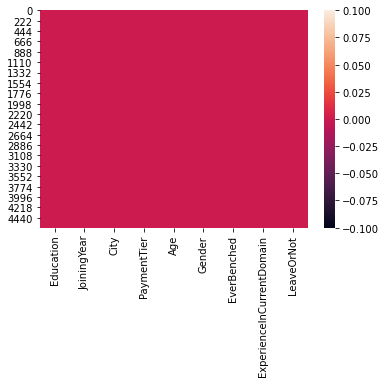

In [5]:
#visualise null values
sb.heatmap(df.isnull())
plt.show()

# Information About Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


## observation
1. here Data set contain 4653 Rows and 8 colunms
2. 4 Feature is object type data and 4 feature is int type data

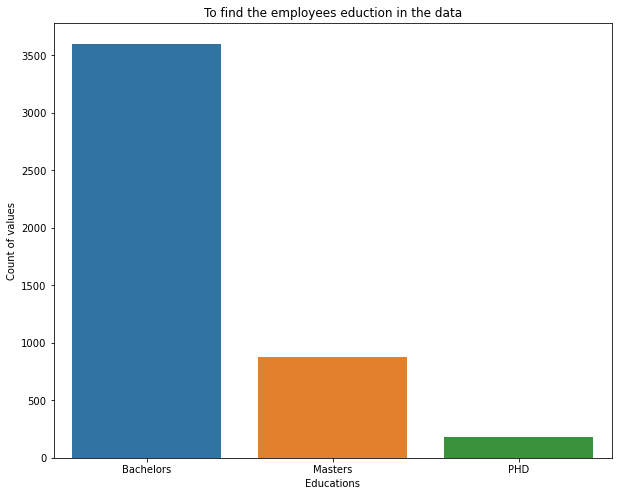

In [7]:
# To create a count plot to understanding the most demanding education
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='Education')
plt.title("To find the employees eduction in the data")
plt.xlabel("Educations")
plt.ylabel("Count of values")
plt.show()

In [8]:
#check education qualification with gender wise
df.groupby(['Education'])['Gender'].value_counts().sort_values(ascending=True)

Education  Gender
PHD        Female      69
           Male       110
Masters    Female     371
           Male       502
Bachelors  Female    1435
           Male      2166
Name: count, dtype: int64

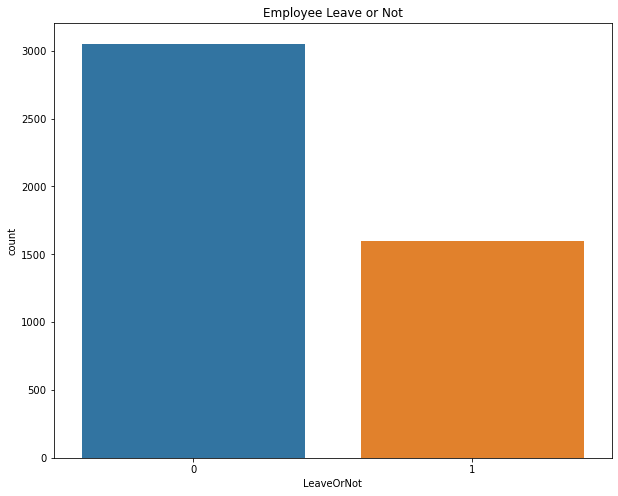

In [9]:
#based on employee data employee take leave or not, visualise 
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='LeaveOrNot')
plt.title('Employee Leave or Not')
plt.show()

In [10]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# convert categorical type data into numericcal type use LabelEncoder


In [11]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.select_dtypes(include='object'):
    label=LabelEncoder()
    label.fit(df[i])
    df[i]=label.transform(df[i])
df.head()
    


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [12]:
#select input and output
x=df.drop(['LeaveOrNot'],axis=1)
y=df['LeaveOrNot']

# Train the model with 75% data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# Create a model

In [14]:
def create_model(model):
    #train the data 
    model.fit(x_train,y_train)
    #test the data
    y_pred=model.predict(x_test)
    
    #generate reprot
    print("Classification report :",classification_report(y_test,y_pred))
    print("confusion matrx:",confusion_matrix(y_test,y_pred))
    plt.show()
    return model

    

# Logistic Regressions 

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [16]:
#call function
lr=create_model(lr)

Classification report :               precision    recall  f1-score   support

           0       0.71      0.92      0.80       737
           1       0.72      0.35      0.47       427

    accuracy                           0.71      1164
   macro avg       0.71      0.64      0.64      1164
weighted avg       0.71      0.71      0.68      1164

confusion matrx: [[678  59]
 [277 150]]


# Decision Tree Clasifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
#create a object
dtc=DecisionTreeClassifier()

In [18]:
#call function
dtc=create_model(dtc)

Classification report :               precision    recall  f1-score   support

           0       0.84      0.88      0.86       737
           1       0.77      0.70      0.74       427

    accuracy                           0.82      1164
   macro avg       0.80      0.79      0.80      1164
weighted avg       0.81      0.82      0.81      1164

confusion matrx: [[649  88]
 [127 300]]


In [19]:
dict={'Input':x.columns,'IG':dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,JoiningYear,0.326475
1,PaymentTier,0.150047
2,Age,0.144125
3,City,0.120816
4,ExperienceInCurrentDomain,0.083299
5,Education,0.081440
6,Gender,0.058596
7,EverBenched,0.035202


# Random Forest Classifier

In [20]:
#to import randomforesttree
from sklearn.ensemble import RandomForestClassifier
#using gini index
#create object
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)  #n_estimators means no of iterations
#call function
rfc=create_model(rfc)

Classification report :               precision    recall  f1-score   support

           0       0.84      0.92      0.88       737
           1       0.84      0.69      0.76       427

    accuracy                           0.84      1164
   macro avg       0.84      0.81      0.82      1164
weighted avg       0.84      0.84      0.83      1164

confusion matrx: [[681  56]
 [134 293]]


In [21]:
#using entropy
rfc=RandomForestClassifier(n_estimators=10,max_features=3,random_state=1,criterion='entropy') 
#n_estimators means no of iterations
#call function
rfc=create_model(rfc)

Classification report :               precision    recall  f1-score   support

           0       0.83      0.92      0.88       737
           1       0.84      0.68      0.75       427

    accuracy                           0.84      1164
   macro avg       0.84      0.80      0.82      1164
weighted avg       0.84      0.84      0.83      1164

confusion matrx: [[681  56]
 [135 292]]


# ADA Boost Classifier

In [22]:
#now performing model with adaboost and to import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#create object of AdaBoostClassifier class
ada=AdaBoostClassifier(n_estimators=2,random_state=1)   #n_estimators means no of iterations
#call function
ada=create_model(ada)

Classification report :               precision    recall  f1-score   support

           0       0.69      1.00      0.82       737
           1       0.99      0.23      0.38       427

    accuracy                           0.72      1164
   macro avg       0.84      0.62      0.60      1164
weighted avg       0.80      0.72      0.66      1164

confusion matrx: [[736   1]
 [327 100]]


# Greadient Boost Classifier

In [23]:
#Performing model with Gradient Boosting and to apply GradientBoostingClassifier on this dataset 
from sklearn.ensemble import GradientBoostingClassifier
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=31) #n_estimators means no of iterations
#call function
gbc=create_model(gbc)

Classification report :               precision    recall  f1-score   support

           0       0.78      0.97      0.87       737
           1       0.91      0.53      0.67       427

    accuracy                           0.81      1164
   macro avg       0.85      0.75      0.77      1164
weighted avg       0.83      0.81      0.80      1164

confusion matrx: [[715  22]
 [199 228]]


# Performing model with Extreme Gradient Boosting 

In [24]:
#we have to first install xgboost if not installed in system 
#!pip install xgboost
#to apply XGBClassifier 
from xgboost import XGBClassifier
#create a object of XGBClassifier
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)   #n_estimators means no of iterations
#call function
xgc=create_model(xgc)

Classification report :               precision    recall  f1-score   support

           0       0.84      0.95      0.89       737
           1       0.90      0.68      0.78       427

    accuracy                           0.85      1164
   macro avg       0.87      0.82      0.83      1164
weighted avg       0.86      0.85      0.85      1164

confusion matrx: [[703  34]
 [135 292]]


# Performing model with support vector machine

In [25]:
#to import LinearSVC 
from sklearn.svm import LinearSVC
#here LinearSVC = Linear suport vector classifier 
#create an object of LinearSVC
svc=LinearSVC(random_state=1)
#call function
svc=create_model(svc)

Classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00       737
           1       0.37      1.00      0.54       427

    accuracy                           0.37      1164
   macro avg       0.18      0.50      0.27      1164
weighted avg       0.13      0.37      0.20      1164

confusion matrx: [[  0 737]
 [  0 427]]


In [26]:
#create object of LinearSVC and adding some external error at training time 
svc1=LinearSVC(random_state=1,C=0.9)  #here c is external error added 
#call function
svc1=create_model(svc)

Classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00       737
           1       0.37      1.00      0.54       427

    accuracy                           0.37      1164
   macro avg       0.18      0.50      0.27      1164
weighted avg       0.13      0.37      0.20      1164

confusion matrx: [[  0 737]
 [  0 427]]


In [27]:
#using polynomial kernel function
from sklearn.svm import SVC
#create object and passing poly in kernel parameter
svc2=SVC(random_state=1,kernel='poly')
#call function
svc2=create_model(svc2)

Classification report :               precision    recall  f1-score   support

           0       0.63      1.00      0.78       737
           1       0.00      0.00      0.00       427

    accuracy                           0.63      1164
   macro avg       0.32      0.50      0.39      1164
weighted avg       0.40      0.63      0.49      1164

confusion matrx: [[737   0]
 [427   0]]


In [28]:
#lets check once with Radial basis
svc3=SVC(random_state=1,kernel='rbf')
#call function
svc3=create_model(svc3)

Classification report :               precision    recall  f1-score   support

           0       0.63      1.00      0.78       737
           1       0.00      0.00      0.00       427

    accuracy                           0.63      1164
   macro avg       0.32      0.50      0.39      1164
weighted avg       0.40      0.63      0.49      1164

confusion matrx: [[737   0]
 [427   0]]


#Here 85% is the highest accuracy score of Extreme Gradient booting algorithm

# conclusion:  85% is the highest accuracy score of Extreme Gradient booting algorithm